In [5]:
%pylab qt
%matplotlib inline

import scipy.constants as cst
import matplotlib.colors as mcol
import matplotlib.cm as cm

def mysavefig(name):
    plt.tight_layout()
    plt.savefig(name, bbox_inches="tight", dpi=200)
    
def amplitude(omega, omega0=1, Q=1, a=1):
    gamma = omega0/Q
    return a*omega0**2 / ( (omega0**2-omega**2) + 1j*omega*gamma )

def vitesse(omega, omega0=1, Q=1, a=1):
    return 1j*omega * amplitude(omega, omega0=omega0, Q=Q, a=a)

def cavity(omega, R):
    phi = omega
    return 1/(1+4*R/(1-R)**2 * (np.sin(phi/2))**2)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


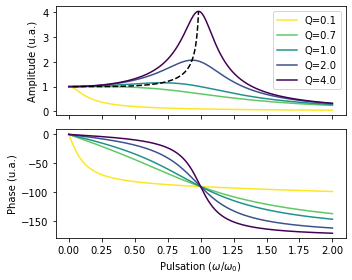

In [52]:
f0 = 1
Q = 0.1

freq = np.linspace(0, 2, 1001)

plt.figure(figsize=(5,4))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

Qs = [0.1, 1/np.sqrt(2),1 , 2, 4]
colormap = plt.cm.viridis
colorst = [colormap(i) for i in np.linspace(0, 1, len(Qs))][::-1]
for i, Q in enumerate(Qs):
    ampl = amplitude(2*np.pi*freq, omega0=2*np.pi*f0, Q=Q)
    ax1.plot(freq, np.abs(ampl), color=colorst[i], label="Q=%.1f"%(Q))
    ax2.plot(freq, np.angle(ampl)*180/np.pi, color=colorst[i])

ax1.set_xticklabels([])
ax1.legend(loc="upper right")
ax1.set_ylabel("Amplitude (u.a.)")

ax2.set_xlabel("Pulsation ($\omega/\omega_0$)")
ax2.set_ylabel("Phase (u.a.)")

q  = np.linspace(1/np.sqrt(2), 4, 10001)
fr = f0*np.sqrt(1 - 1/2/q**2)
m  = np.abs(amplitude(2*np.pi*fr, omega0=2*np.pi*f0, Q=q))
ax1.plot(fr, m, "--k")

mysavefig("amplitude_fr.png")

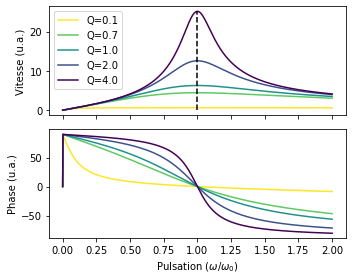

In [55]:
plt.figure(figsize=(5,4))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

Qs = [0.1, 1/np.sqrt(2),1 , 2, 4]
colormap = plt.cm.viridis
colorst = [colormap(i) for i in np.linspace(0, 1, len(Qs))][::-1]
for i, Q in enumerate(Qs):
    vit = vitesse(2*np.pi*freq, omega0=2*np.pi*f0, Q=Q)
    ax1.plot(freq, np.abs(vit), color=colorst[i], label="Q=%.1f"%(Q))
    ax2.plot(freq, np.angle(vit)*180/np.pi, color=colorst[i])

ax1.set_xticklabels([])
ax1.legend(loc="upper left")
ax1.set_ylabel("Vitesse (u.a.)")

ax2.set_xlabel("Pulsation ($\omega/\omega_0$)")
ax2.set_ylabel("Phase (u.a.)")

ax1.plot([1,1], [0, np.max(np.abs(vit))], "--k")

mysavefig("vitesse_fr.png")

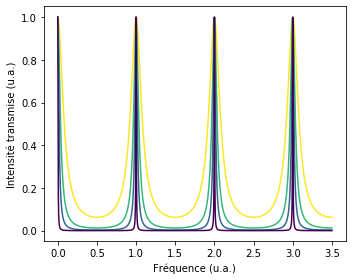

In [17]:
omega = 2*np.pi*np.linspace(0,3.5, 10001)

plt.figure(figsize=(5,4))

Rs = 1-np.array([0.4,0.2,0.1,0.02])
colormap = plt.cm.viridis
colorst = [colormap(i) for i in np.linspace(0, 1, len(Rs))][::-1]
for i,R in enumerate(Rs):
    amp = cavity(omega, R)
    plt.plot(omega/2/np.pi, amp, color=colorst[i])
plt.xlabel("Fréquence (u.a.)")
plt.ylabel("Intensité transmise (u.a.)")

mysavefig("cavity.png")

1498.96229